In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [3]:
test_data.shape

(102, 13)

### 数据标准化处理

In [4]:
mean = train_data.mean(axis=0)

In [5]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [6]:
train_data -= mean

In [7]:
train_data[0]

array([-2.51264057e+00, -1.14801980e+01, -2.96443069e+00, -6.18811881e-02,
       -1.93559406e-02, -1.25081683e-01,  2.26893564e+01,  2.36629208e-01,
       -5.44059406e+00, -9.88985149e+01,  2.52400990e+00,  4.21168317e+01,
        5.97918317e+00])

In [8]:
std = train_data.std(axis=0)

In [9]:
train_data /= std

In [10]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [11]:
test_data -= mean
test_data /= std

### 定义模型

In [12]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

### k折验证

In [13]:
import numpy as np

epochs = 128
k = 4
data_num = len(train_data) // k
all_scores = []

In [14]:
data_num

101

In [15]:
for i in range(k):
    val_train_data = train_data[i*data_num: (i+1)*data_num]
    val_train_targets = train_targets[i*data_num: (i+1)*data_num]
    
    partial_train_data = np.concatenate([train_data[:i*data_num], train_data[(i+1)*data_num:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*data_num], train_targets[(i+1)*data_num:]], axis=0)
    
    model = build_model()
    
    model.fit(partial_train_data, partial_train_targets, epochs=epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(test_data, test_targets, verbose=0)
    all_scores.append(val_mae)

Metal device set to: Apple M1


2023-05-12 20:05:37.706911: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [16]:
all_scores

[2.516313076019287, 2.8551647663116455, 2.630406141281128, 2.7907278537750244]

np.mean(all_scores)

### 保存每折验证结果

In [19]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    val_train_data = train_data[i*data_num: (i+1)*data_num]
    val_train_targets = train_targets[i*data_num: (i+1)*data_num]
    
    partial_train_data = np.concatenate([train_data[:i*data_num], train_data[(i+1)*data_num:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*data_num], train_targets[(i+1)*data_num:]], axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_train_data, val_train_targets),epochs=num_epochs, batch_size=16, verbose=0)
    print(history.history.keys())
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [20]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [21]:
average_mae_history

[19.639942169189453,
 16.472001552581787,
 12.442573547363281,
 8.646499872207642,
 6.451321959495544,
 5.279882431030273,
 4.5015709400177,
 4.036596655845642,
 3.7287986874580383,
 3.589330315589905,
 3.3992576599121094,
 3.2811736464500427,
 3.1776252388954163,
 3.094429135322571,
 3.0422104001045227,
 2.9351008534431458,
 2.8998918533325195,
 2.838963270187378,
 2.830385982990265,
 2.779206335544586,
 2.7406468987464905,
 2.7188549637794495,
 2.6597344279289246,
 2.6447134613990784,
 2.63751357793808,
 2.6494523882865906,
 2.5959529280662537,
 2.5805578231811523,
 2.575019121170044,
 2.585629403591156,
 2.580200731754303,
 2.5162887573242188,
 2.5419376492500305,
 2.58982115983963,
 2.526302218437195,
 2.55404269695282,
 2.5469180941581726,
 2.4973738193511963,
 2.4865448474884033,
 2.4716670513153076,
 2.5057445764541626,
 2.49660187959671,
 2.4411070942878723,
 2.473393678665161,
 2.4790198802948,
 2.457118332386017,
 2.5114588737487793,
 2.424005925655365,
 2.5007770657539368,
 

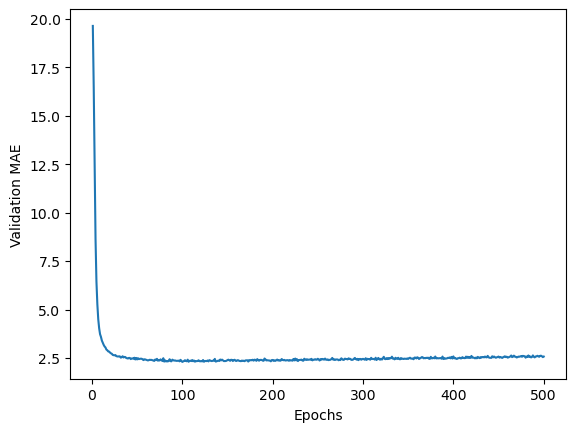

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

IndentationError: expected an indented block (3063614458.py, line 4)